In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 18,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
})

In [3]:
def F(n, F0, OMEGA):
    gamma = 0
    F_vall = F0 * np.cos(OMEGA * n + gamma)
    return F_vall

def f(n, y, omega, beta, F0, OMEGA, t):
    v_t = y[1, n]
    return v_t

def g(n, y, omega, beta, F0, OMEGA, t):
    x_t = y[0, n]
    v_t = y[1, n]
    return -np.power(omega, 2)*x_t - beta*v_t + F(t[n], F0, OMEGA)


In [4]:

def RK4(y, dt, funcs, omega, beta, F0, OMEGA, t):
    for n in range(0, y.shape[1] - 1):
        for fi in range(y.shape[0]):
            y_n = funcs[fi](n, y, omega, beta, F0, OMEGA, t)

            k1 = y_n
            k2 = y_n + 0.5*dt*k1
            k3 = y_n + 0.5*dt*k2
            k4 = y_n + dt*k3

            y[fi, n + 1] =  y[fi, n] + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)


In [5]:
def simulate_and_plot(data):
    k = data["k"]
    m = data["m"]
    beta = data["beta"]
    F0 = data["F0"]
    OMEGA = data["OMEGA"]

    omega = np.sqrt(k/m)
    T0 = 2*np.pi/omega

    dt = 10e-4
    t = np.arange(0, 4*T0 + dt, dt)

    x = np.zeros(len(t))
    v = np.zeros(len(t))
    funcs = [f, g]

    x[0] = data["x0"]
    v[0] = data["v0"]
    y = np.array([x, v])

    RK4(y, dt, funcs, omega, beta, F0, OMEGA, t)
    x = y[0]
    v = y[1]

    Epot = 0.5 * k * np.power(x, 2)
    Ekin = 0.5 * m * np.power(v, 2)
    Etot = Epot + Ekin

    axs = plt.subplots(2, 1, figsize=(12, 16))[1]

    plot_title = data["plot_title"]

    ax = axs[0]
    ax.plot(t, y[0], label='x(t)')
    ax.plot(t, y[1], label='v(t)')
    ax.set_title(rf"{plot_title}: $x_0$={x[0]}, $v_0$={v[0]}, $\omega$={omega} (k={k}, m={m}), $\beta$={beta}, $F_0$={F0}")
    ax.set_ylabel(r"x(t), v(t)")
    ax.legend()
    ax.grid()

    ax = axs[1]
    ax.plot(t, Epot, label=r"$E_{\text{pot}}(t)$")
    ax.plot(t, Ekin, label=r"$E_{\text{kin}}(t)$")
    ax.plot(t, Etot, label=r"$E_{\text{tot}}(t)$")
    ax.set_ylabel(r"$E_{\text{pot}}(t)$, $E_{\text{kin}}(t)$, $E_{\text{tot}}(t)$")
    ax.legend()
    ax.grid()

    plt.show()

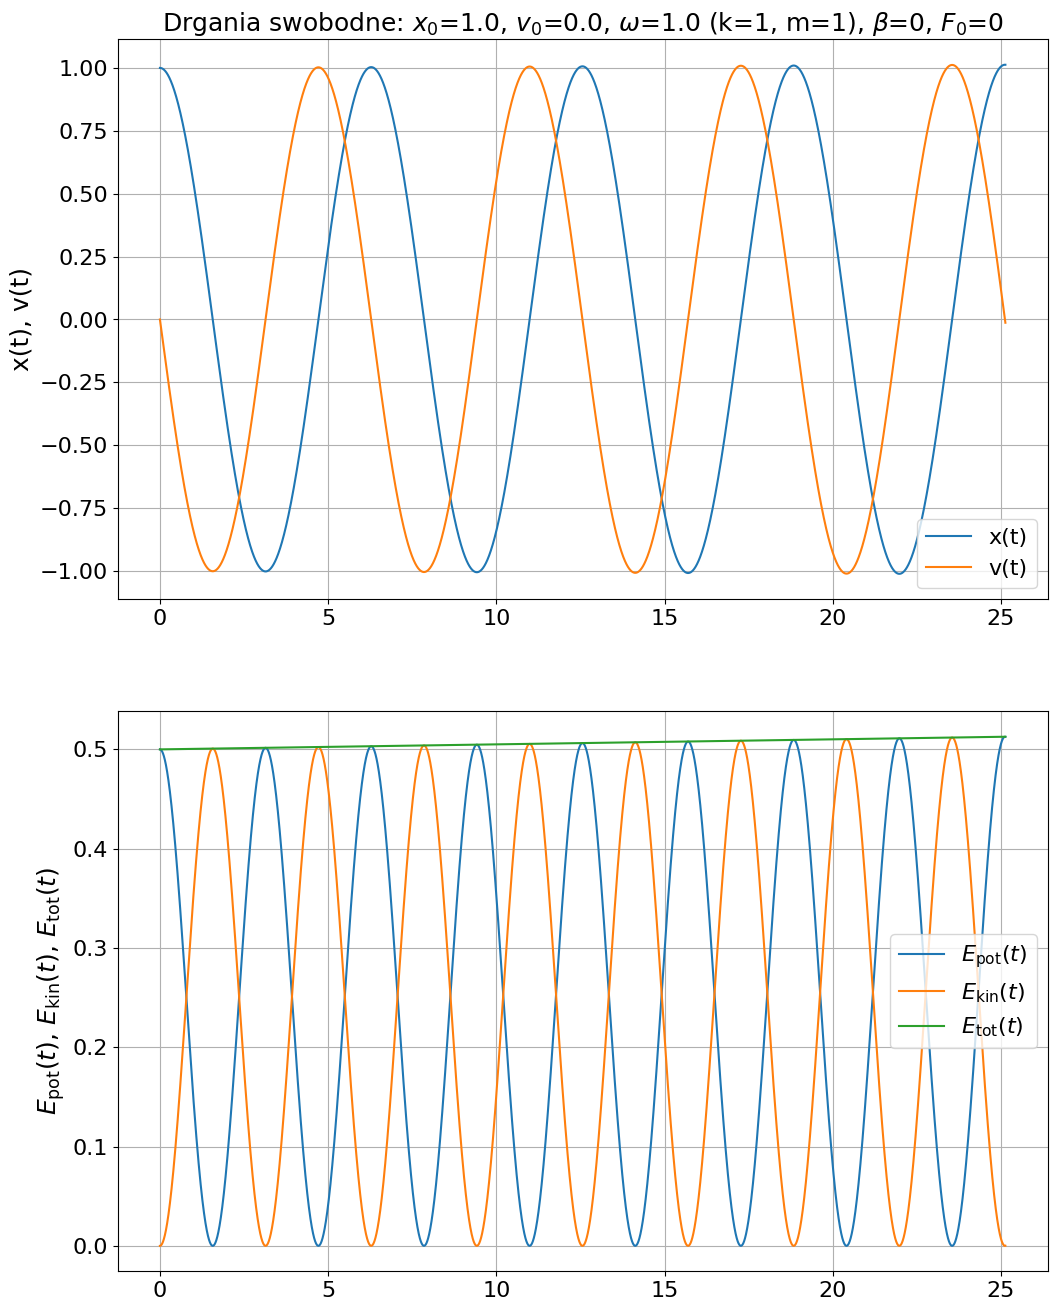

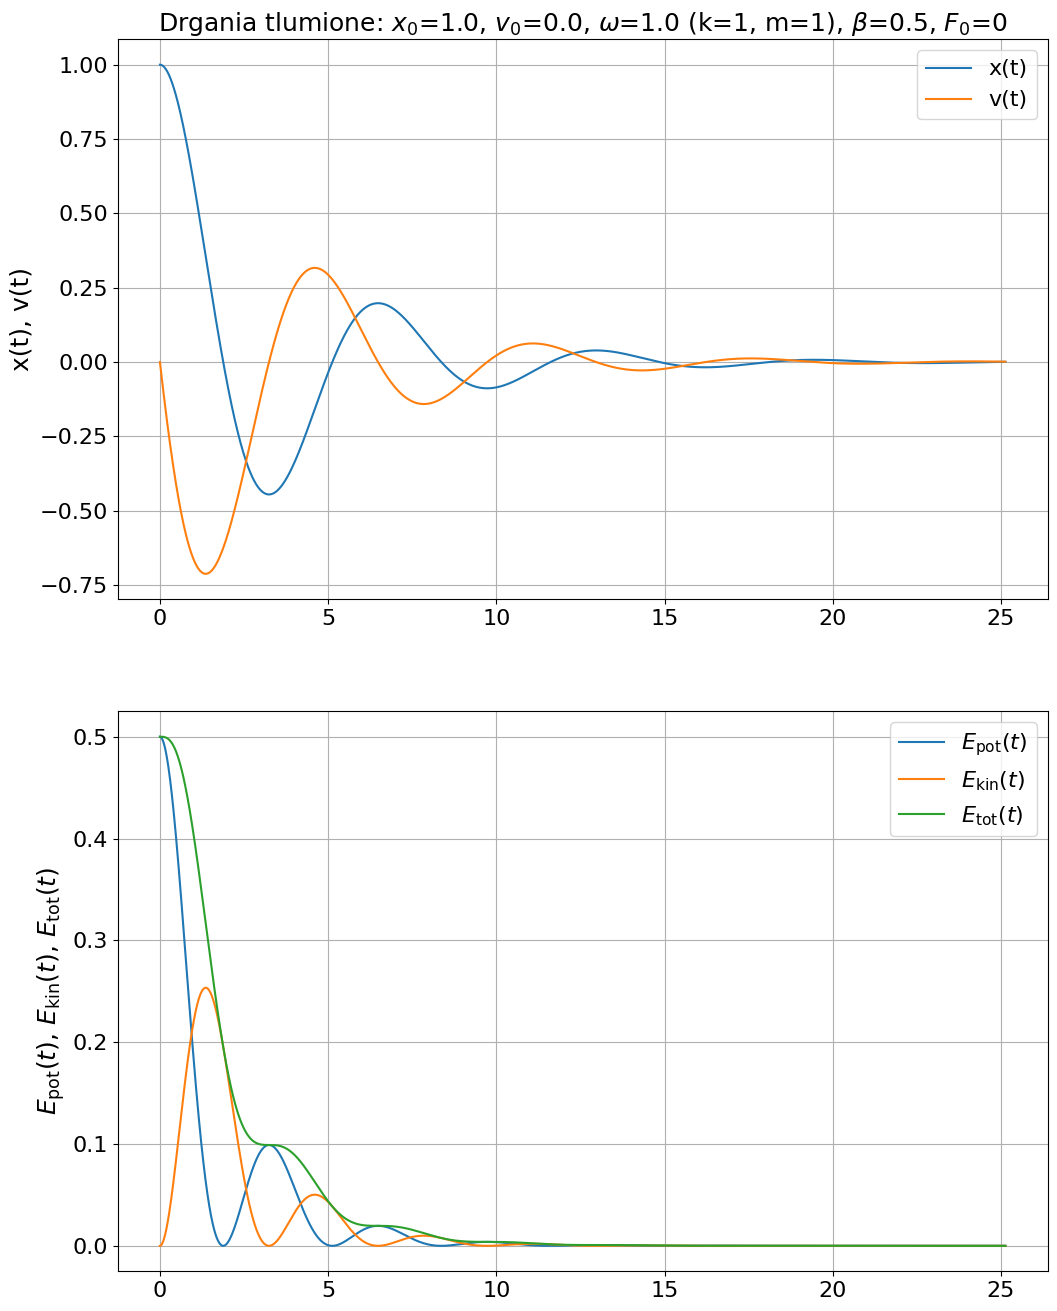

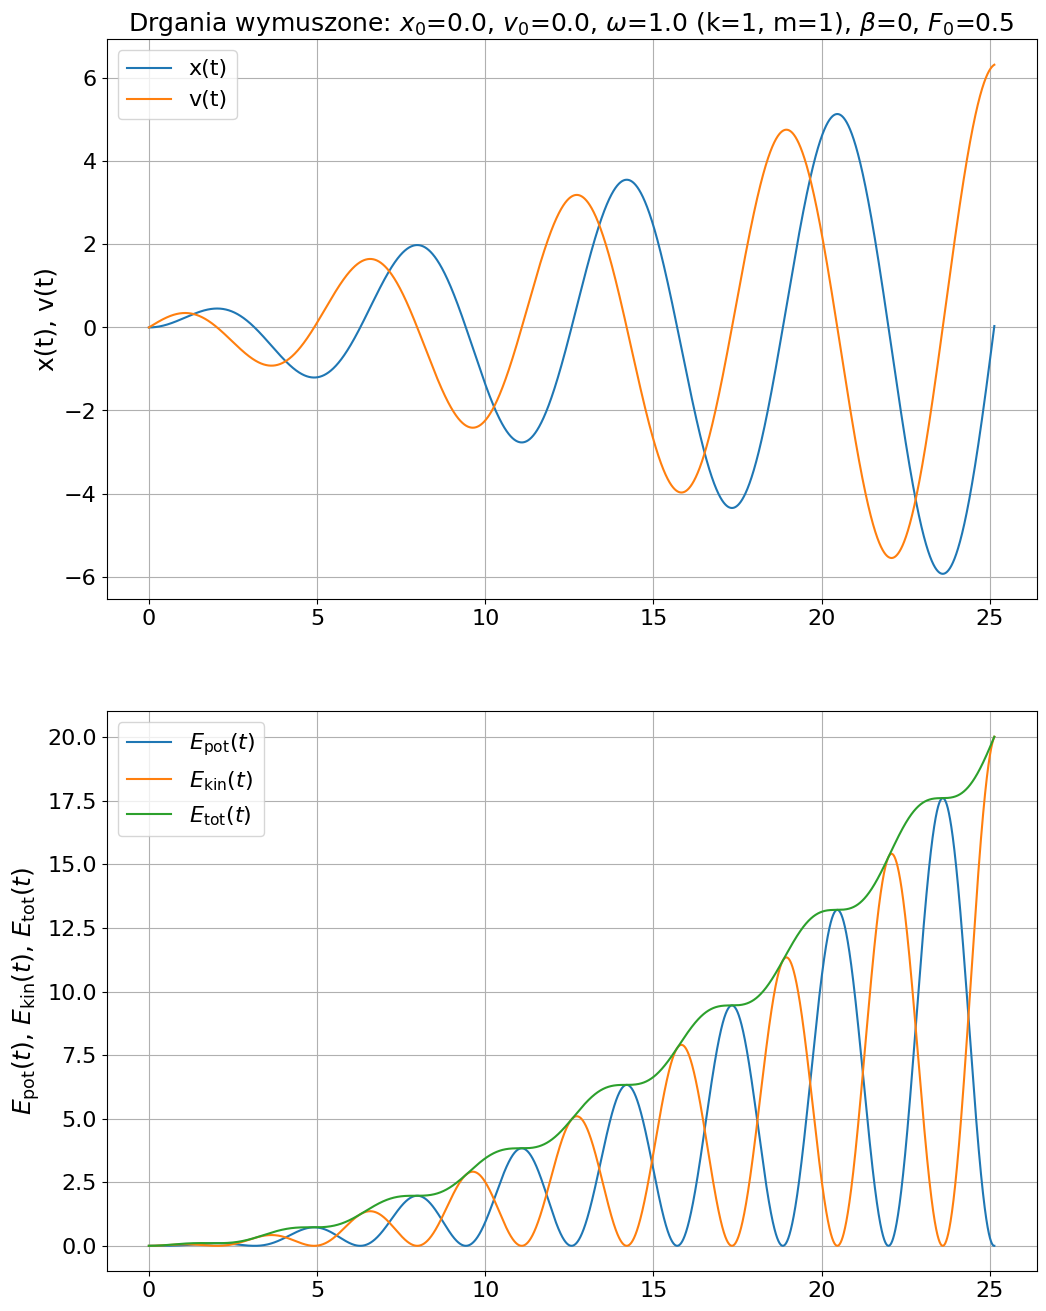

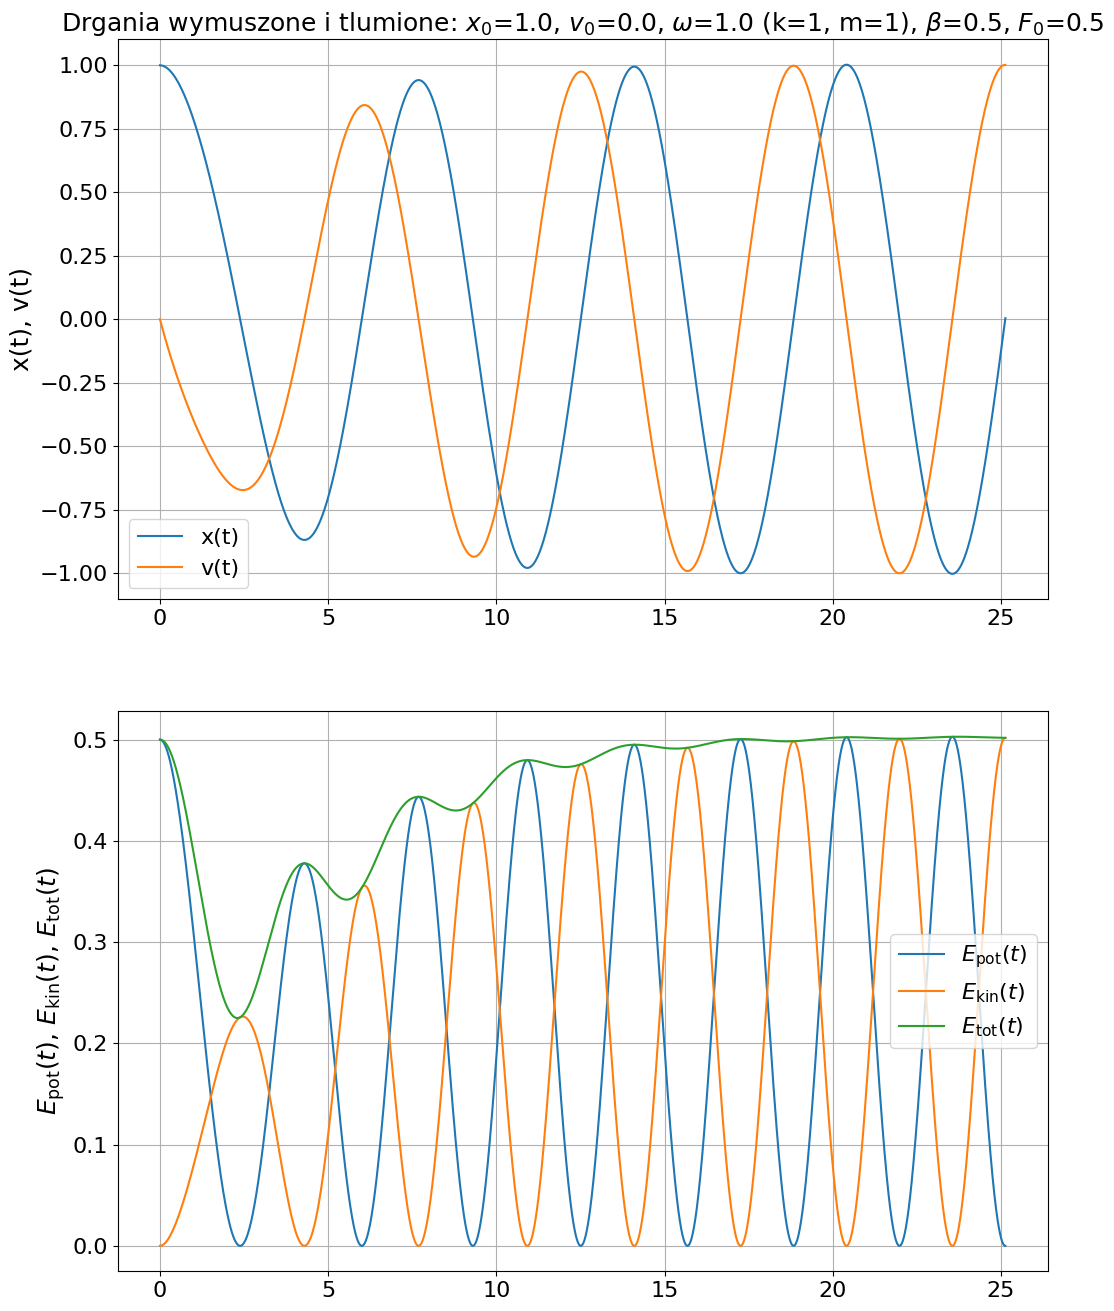

In [6]:
starting_data = [
    {
        "plot_title": "Drgania swobodne",
        "x0": 1,
        "v0": 0,
        "k": 1,
        "m": 1,
        "beta": 0,
        "F0": 0,
        "OMEGA": 0,
    },
    {
        "plot_title": "Drgania tlumione",
        "x0": 1,
        "v0": 0,
        "k": 1,
        "m": 1,
        "beta": 0.5,
        "F0": 0,
        "OMEGA": 0,
    },
    {
        "plot_title": "Drgania wymuszone",
        "x0": 0,
        "v0": 0,
        "k": 1,
        "m": 1,
        "beta": 0,
        "F0": 0.5,
        "OMEGA": 1,
    },
    {
        "plot_title": "Drgania wymuszone i tlumione",
        "x0": 1,
        "v0": 0,
        "k": 1,
        "m": 1,
        "beta": 0.5,
        "F0": 0.5,
        "OMEGA": 1,
    },
]

for data in starting_data:
    simulate_and_plot(data)
